In [1]:
from Undistorter import Undistorter
undistorter = Undistorter()
print("Distortion Initiation Success")

from Thresholder import Thresholder
thresholder = Thresholder()
print("Thresholding Initiation Success")

from PerspectiveTransformer import PerspectiveTransformer
ptransformer = PerspectiveTransformer()
print("Perspective Transformer Initiation Success")

from LaneDetector import LaneDetector
laneDetector = LaneDetector()
print("Lane Detector Initiation Success") 

from LanePlotter import LanePlotter
lanePlotter = LanePlotter()
print("Lane Plotter Initiation Success") 

Distortion Initiation Success
Thresholding Initiation Success
Perspective Transformer Initiation Success
Lane Detector Initiation Success
Lane Plotter Initiation Success


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

720


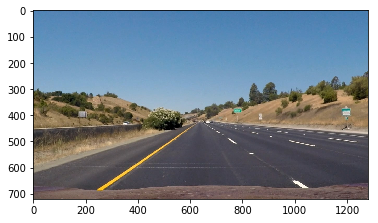

In [3]:
image = cv2.imread('../test_images/straight_lines1.jpg')
print(image.shape[0])
img = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

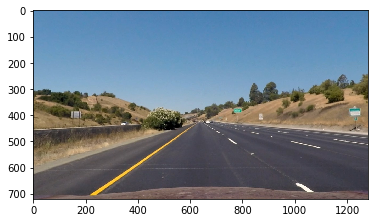

In [4]:
dist_img = undistorter.undistort(img)
plt.imshow(dist_img)
plt.show()

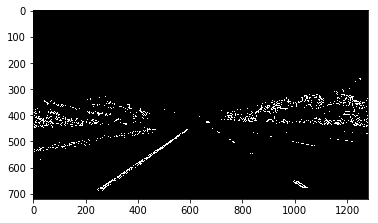

In [5]:
thresh_img = thresholder.threshold(img)
plt.imshow(thresh_img,cmap='gray')
plt.show()

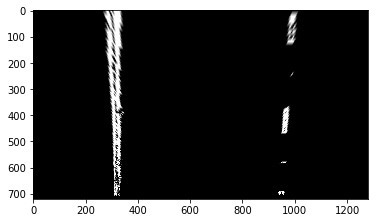

True

In [6]:
warp_img = ptransformer.warp(thresh_img)
plt.imshow(warp_img,cmap='gray')
plt.show()
cv2.imwrite('warped.jpg', warp_img*255)

In [7]:
left_fit,right_fit = laneDetector.detect(warp_img)

[ -1.16509427e-05   3.36666940e-02   3.05140958e+02]


In [8]:
left_curverad,righr_curverad = laneDetector.get_curvature(warp_img)

[ -1.16509427e-05   3.36666940e-02   3.05140958e+02]
14095.671499 m 7690.58086224 m


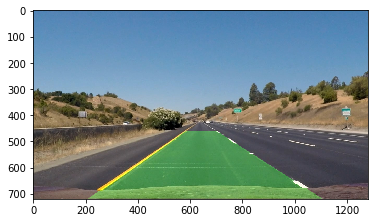

In [9]:
final_img = lanePlotter.plot(img,left_fit,right_fit,ptransformer.Minv)
plt.imshow(final_img)
plt.show()

In [10]:
from LaneTracker import LaneTracker
laneTracker = LaneTracker()

[ -1.86027134e-05   4.02973000e-02   3.04068721e+02]
[ -1.86027134e-05   4.02973000e-02   3.04068721e+02]
8828.14514364 m 6132.05597612 m


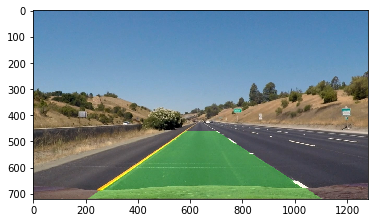

In [11]:
proc_img = laneTracker.process(img)
plt.imshow(proc_img)
plt.show()